In [1]:
!pip install pystan

In [5]:
import os
import pystan
import seaborn as sns
import pandas as pd
from math import exp, cos, pi, log

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [7]:
My_data=pd.read_csv("/content/gdrive/My Drive/data.csv")
My_data=My_data.fillna(0)
My_data


,t5,t6,t9,t12,t15,t20
0,386.0,249.0,108.0,66.0,67.0,59.0
1,281.0,229.0,39.0,38.0,0.0,18.0
2,0.0,115.0,0.0,0.0,0.0,28.0
3,122.0,0.0,105.0,21.0,34.0,32.0
4,868.0,482.0,370.0,0.0,98.0,72.0
...,...,...,...,...,...,...
159,463.0,254.0,0.0,97.0,0.0,47.0
160,478.0,93.0,0.0,38.0,23.0,20.0
161,0.0,402.0,0.0,0.0,26.0,20.0
162,159.0,100.0,48.0,31.0,14.0,12.0


In [16]:
code ='''
data {
    int T;  // Time
    int N;  // number of individuals
    real time[T]; // time measurements
    real dset[N,T]; // data
    
 }
parameters {
    real b0;
    real b1;
    vector[N] C;
    real<lower = 0> delta_C;
    real<lower = 0> delta_ERR;
}
model {
    delta_ERR ~ exponential(1);
    delta_C ~ exponential(1);
    b0 ~ normal(0,1);
    b1 ~ normal(0,1);
    C ~ normal(0,delta_C);
    for (t in 1:T) {
        for (i in 1:N) {
            if (dset[i,t] != 0)  {dset[i,t] ~ normal(C[i] + b0 + b1 * time[t],delta_ERR);}
        }
    }
}
'''
sm = pystan.StanModel(model_code=code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0a590fdc53dbb0c860b77ce393964461 NOW.


In [18]:
T=6
time = [log(x) for x in [1,2,5,8,11,16]]
N = len(My_data)
data  = dict(
        T=T,
        N=N,
        dset=My_data.values,
        time=time)
init = dict(
    b0 = 6,
    b1 = -2,
    C = [0]*N,
    delta_C=1,
    delta_ERR=1)  


In [19]:
fit = sm.sampling(data=data, iter=1500, chains=4, init=[init]*4,thin=1)
op = fit.extract()  

In [24]:
print(op.keys())

odict_keys(['b0', 'b1', 'C', 'delta_C', 'delta_ERR', 'lp__'])


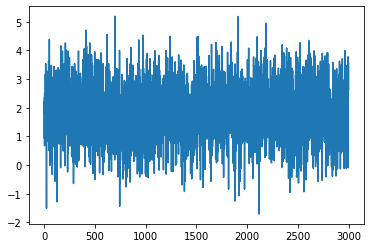

In [22]:
sns.lineplot(x=range(1,3001),y=op['b0'])

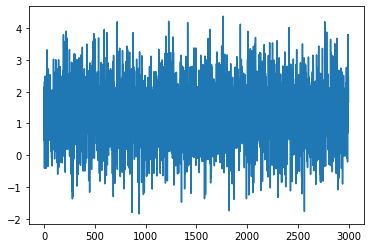

In [25]:
sns.lineplot(x=range(1,3001),y=op['b1'])

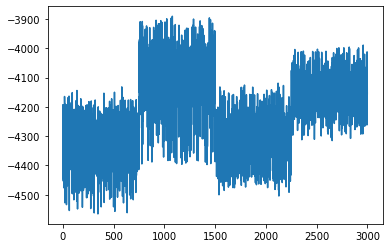

In [26]:
sns.lineplot(x=range(1,3001),y=op['lp__'])

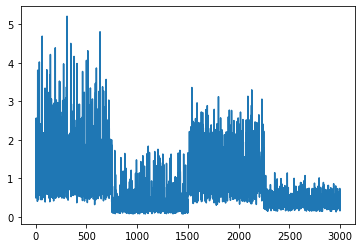

In [28]:
sns.lineplot(x=range(1,3001),y=op['delta_C'])

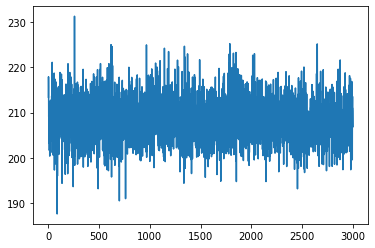

In [29]:
sns.lineplot(x=range(1,3001),y=op['delta_ERR'])